# Ultimate Data Science Challenge

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime as dt, timedelta
import matplotlib.pyplot as plt
import random as rd
import scipy.stats as stats
from sklearn.linear_model import LinearRegression as LinR, LogisticRegression as LogR
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import roc_curve, auc,accuracy_score, confusion_matrix, roc_auc_score, precision_recall_curve, classification_report
from sklearn import metrics
from sklearn.model_selection import KFold,GridSearchCV as GSCV, RandomizedSearchCV as RSCV
from sklearn.ensemble import RandomForestClassifier as RFC,RandomForestRegressor as RFR
import sklearn.model_selection
from sklearn import svm 
import category_encoders as ce
from sklearn import svm, datasets
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import pickle 
import os
from itertools import cycle
from scipy import interp
import json
import datetime
from statsmodels.tsa.stattools import adfuller
plt.style.use('ggplot')

# Part 1

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [2]:
# Import json file
json_file1 = 'logins.json'
df1 = pd.read_json(json_file1)
df1=df1.set_index(df1.login_time)
df1['Count'] =1
df1 = df1.drop("login_time",axis=1)
df1.head(3)

,Count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
Count    93142 non-null int64
dtypes: int64(1)
memory usage: 1.4 MB


In [4]:
print('First date: ',df1.index.min())
print('Last date:  ',df1.index.max())

First date:  1970-01-01 20:12:16
Last date:   1970-04-13 18:57:38


In [5]:
def get_weekdays(x):
    """Get weekdays from weekday numbers"""
    days = []
    for i in x:
        days.append(weekDays[i])
    return days

In [6]:
# Add day of the week to each row
weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
daynums = list(map(lambda x: x.weekday(),df1.index))
df1['weekday'] = get_weekdays(daynums)
df1.head(3)

,Count,weekday
login_time,,
1970-01-01 20:13:18,1,Thursday
1970-01-01 20:16:10,1,Thursday
1970-01-01 20:16:37,1,Thursday


Text(0.5,0,'Date (resampled by day)')

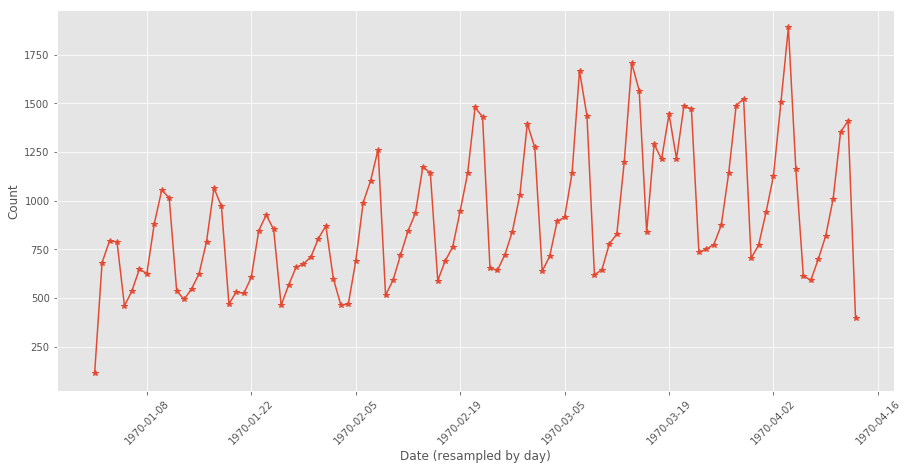

In [7]:
# Resample by day
fig, ax = plt.subplots(figsize=(15, 7))
df2 = df1.resample("1D").sum()
plt.plot(df2.Count,Marker='*')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Date (resampled by day)')

[datetime.date(1970, 1, 2), datetime.date(1970, 1, 28), 0, 2000]

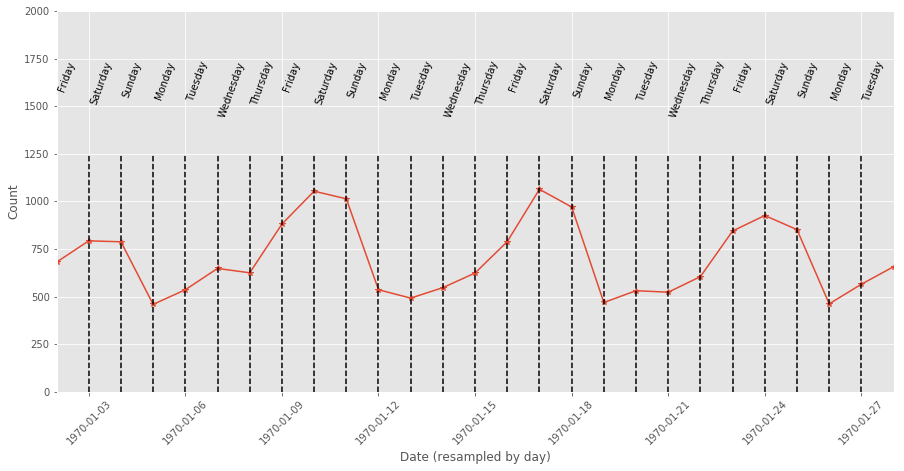

In [8]:
# Resample by day, zooming in and showing days of the week
fig, ax = plt.subplots(figsize=(15, 7))
df2 = df1.resample("1D").sum()
plt.plot(df2.Count,Marker='*')

for i in range(2,28):
    tmpdate = dt.strptime('01/'+str(i)+'/1970','%m/%d/%Y').date()
    plt.plot([tmpdate,tmpdate],[0,1250],'--',color='k')
    text = get_weekdays([tmpdate.weekday()])
    plt.text(tmpdate,1700,text[0],rotation=70)
    
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Date (resampled by day)')
plt.axis([dt.strptime('01/02/1970','%m/%d/%Y').date(),dt.strptime('01/28/1970','%m/%d/%Y').date(),0,2000])

<div class="span5 alert alert-success">
<p> Above, we see that there is a cyclical pattern week to week, with the maximum for each week occuring on Saturday. Sunday and Friday are in 2nd and 3rd place, respectively.
   </p>
</div>

Text(0.5,0,'Date (resampled by week)')

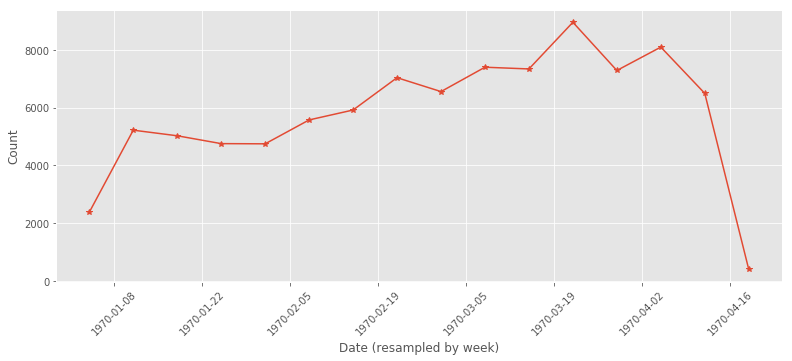

In [9]:
# Resample by week
fig, ax = plt.subplots(figsize=(13, 5))
dfweek = df1.resample("1W").sum()
plt.plot(dfweek.Count,Marker='*')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Date (resampled by week)')

<div class="span5 alert alert-success">
<p> Sampling by week, we see there is growth in the total count, peaking in March and then dropping off a bit.
   </p>
</div>

Text(0.5,0,'Date (resampled by 15 min)')

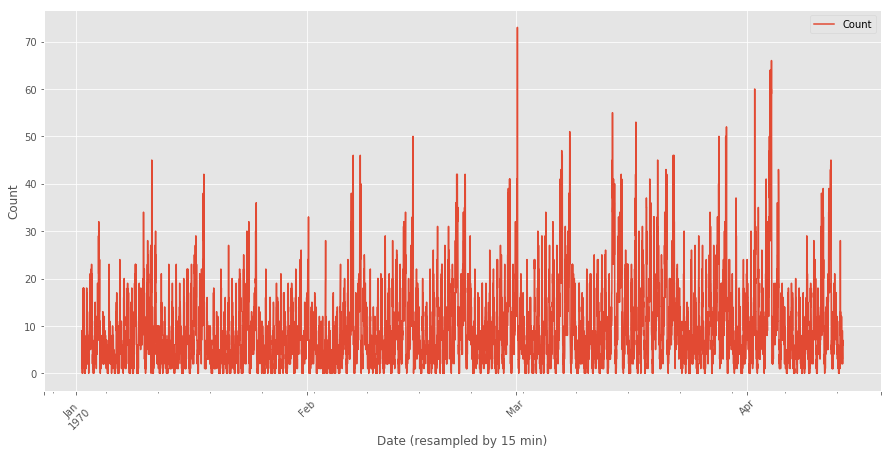

In [10]:
# Resample by 15 minutes
df15min = df1.resample("15Min").sum()
daynums = list(map(lambda x: x.weekday(),df15min.index))
df15min['weekday'] = get_weekdays(daynums)
df15min.plot(figsize=(15, 7))
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Date (resampled by 15 min)')

[datetime.date(1970, 1, 2), datetime.date(1970, 1, 10), 0, 30]

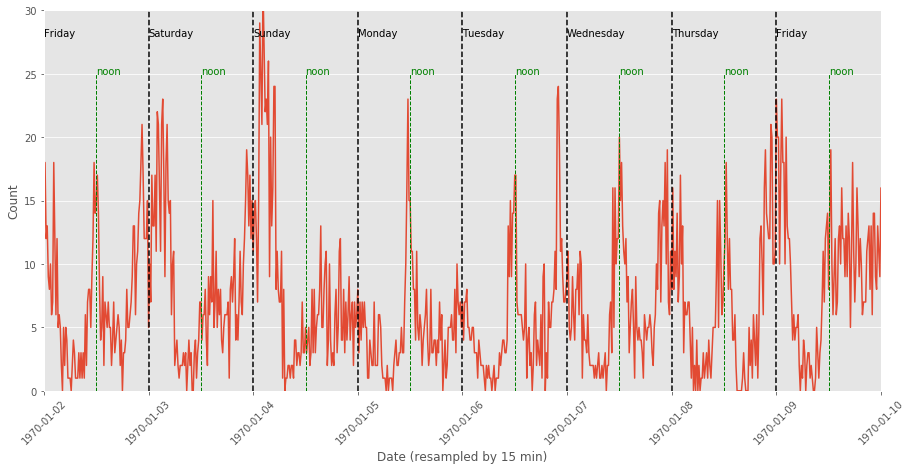

In [11]:
# Zoom in to just one week
fig, ax = plt.subplots(figsize=(15, 7))
plt.plot(df15min.index,df15min.Count.values)
plt.xticks(rotation=45)
for i in range(2,10):
    tmpdate = dt.strptime('01/0'+str(i)+'/1970','%m/%d/%Y').date()
    tmpdatenoon = dt.strptime('01/0'+str(i)+'/1970/12','%m/%d/%Y/%H')
    plt.plot([tmpdatenoon,tmpdatenoon],[0,25],'--',color='g',LineWidth=1)
    plt.plot([tmpdate,tmpdate],[0,30],'--',color='k')
    text = get_weekdays([tmpdate.weekday()])
    plt.text(tmpdate,28,text[0])
    plt.text(tmpdatenoon,25,'noon',color='g')
plt.ylabel('Count')
plt.xlabel('Date (resampled by 15 min)')
plt.axis([dt.strptime('01/02/1970','%m/%d/%Y').date(),dt.strptime('01/10/1970','%m/%d/%Y').date(),0,30])

<div class="span5 alert alert-success">
<p> We can dig into the weekly pattern in more detail. For this week, above, we see the weekly peak a bit after midnight on Sunday morning. The rest of the week, we see local peaks around midnight and noon on each day. The exceptions would be Sunday and Monday nights at midnight, where there is no increase in the total count.
    
Below is a histogram of the counts, grouped by weekday. We can see the pattern as above, with a peak around Saturday or Sunday, a minimum on Monday, and slow rise through the week.
   </p>
</div>

Text(0,0.5,'Count')

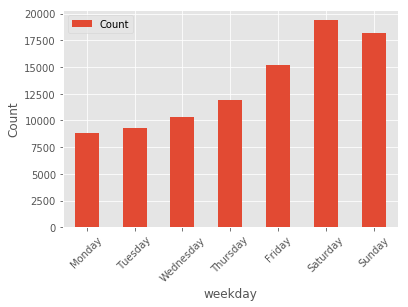

In [12]:
# Group by weekday
dfD = df1.groupby('weekday').sum()
new_index= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
dfD2 = dfD.reindex(new_index)
dfD2.plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Count')

In [13]:
def test_stationarity(dfin,window,show_calcs=0):
    """Plot the rolling average and standard deviation, and perform a Dickey-Fuller test 
    https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/"""

    dfin = dfin.Count
    
    #Determing rolling statistics
    rolmean = dfin.rolling(window).mean() 
    rolstd = dfin.rolling(window).std() 

    #Plot rolling statistics:
    orig = dfin.plot(color='blue',label='Original')
    mean = rolmean.plot(color='red', label='Rolling Mean')
    std = rolstd.plot(color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    if show_calcs:
        print('Results of Dickey-Fuller Test:')
        dftest = adfuller(dfin, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], 
                             index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key,value in dftest[4].items():
            dfoutput['Critical Value (%s)'%key] = value
        print(dfoutput)

<div class="span5 alert alert-success">
<p> Below, we see the rolling average and standard deviation for the data, plotted along with the resampled-by-day data. The counts appear to decrease slightly in January, and then increase to a peak around mid-March. The data then drops a bit, though we would need more data to know for sure if this is a long-term downward trend. Note that the standard deviation also appears to increase over time.
   </p>
</div>

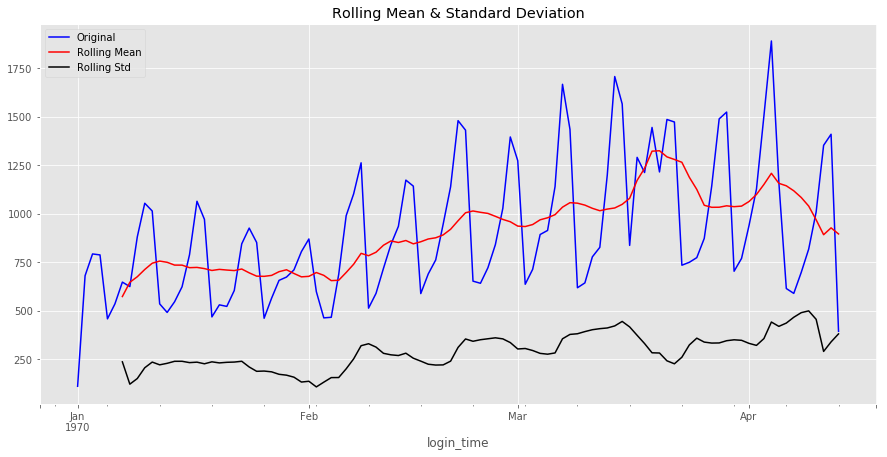

Results of Dickey-Fuller Test:
Test Statistic                 -1.403316
p-value                         0.580685
#Lags Used                     13.000000
Number of Observations Used    89.000000
Critical Value (1%)            -3.506057
Critical Value (5%)            -2.894607
Critical Value (10%)           -2.584410
dtype: float64


In [14]:
# Calculate rolling average from daily-resample, with weekly window size
fig = plt.figure(figsize=(15, 7))
winsize = 7
test_stationarity(df2,winsize,1)

<div class="span5 alert alert-success">
<p> Overall, we can make the following conclusions:
    
   1) There is a long-term trend upwards, peaking mid-march. 
    
   2) The moving standard deviation also has a slight upward trend.
    
   3) Each week starting on Monday, the total count increases steadily, peaking between Saturday and Sunday.
    
   4) On most days, the maxima are around midnight and noon.
   </p>
</div>

# Part 2


The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

#### Question 1

<div class="span5 alert alert-success">
<p> Before we decide on a metric, we have to make a few assumptions about the nature of the problem.
    
   A) There is "surge" pricing, i.e. the cost of a ride depends on the supply of and demand for drivers.
   
   B) Surge pricing causes a certain fraction of users to decide not to use Ultimate, and this fraction correlates with the magnitude of the surge.
   
   C) Drivers are not paid between rides (i.e. when their car has no passengers).
    
   In the plot below, we see a schematic of the supply-and-demand curves, before and after surging, and before and after toll reimbursement. In normal (not surge) conditions, the market supply and demand meet at M1 = (Q1, P1). With a surge, but without toll reimbursement, the market meets at M2 = (Q2, P2). And with toll reimbursement, we are essentially increasing the supply, bringing the market to M3 = (Q3, P3). These curves are obviously an oversimplification, but they give us a way to think about the problem. With toll reimbursement, the revenue at surge is R2 = [P2 * Q2]. With toll reimbursement, the revenue at surge is R3 = [P3 * Q3 - tolls]. The metric of interest is thus R3/R2. If the additional revenue offsets the reimbursement of the tolls, i.e. R3/R2 > 1, then toll reimbursement is worth doing.
   </p>
</div>

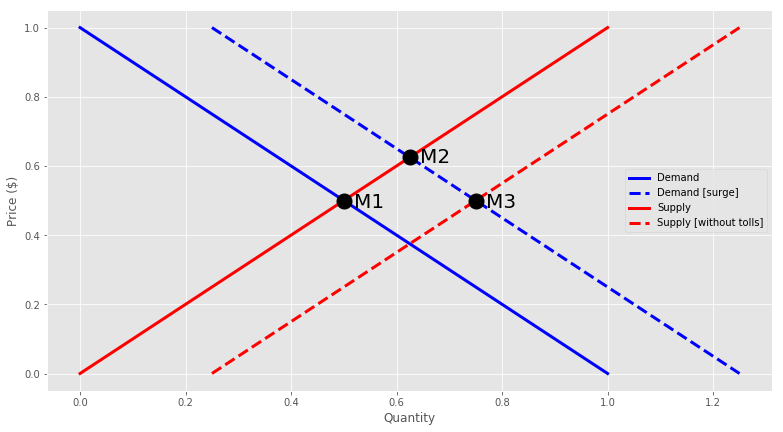

In [15]:
fig = plt.figure(figsize=(13, 7))
demand1 = [1,0]
supply1 = [0,1]
plt.plot([0,1],demand1,LineWidth=3,color='b')
plt.plot([.25,1.25],demand1,'--',LineWidth=3,color='b')
plt.plot([0,1],supply1,LineWidth=3,color='r')
plt.plot([.25,1.25],supply1,'--',LineWidth=3,color='r')
plt.plot([0.5],[0.5],'o',color='k',MarkerSize=15)
plt.plot([0.75],[0.5],'o',color='k',MarkerSize=15)
plt.plot([0.625],[0.625],'o',color='k',MarkerSize=15)
plt.text(0.52,0.48,'M1',size=20)
plt.text(0.645,0.61,'M2',size=20)
plt.text(0.77,0.48,'M3',size=20)
plt.xlabel('Quantity')
plt.ylabel('Price ($)')
plt.legend(['Demand','Demand [surge]','Supply','Supply [without tolls]'],loc='center right')

#### Question 2

<div class="span5 alert alert-success">
<p> To test the cost-effectiveness of reimbursing toll costs, we can run an experiment that splits the drivers into two groups: one where tolls are reimbursed and one where they are not. 
    
   A) Drivers will be randomly split into these 2 groups, making sure that each group contains a balanced mix of the overall population. That is, about 50% of each group should be from Gotham and 50% should be from Metropolis. We'll say that Group A is the control, with no changes. Group B gets reimbursed for all tolls. These groups don't need to encompass the entire population of drivers, but they need to be large enough to ensure statistical significance, and they should be equal in size. I would suggest at least 1000 in each group, and conduct the experiment over at least one week, preferably more like one month. 
   
   B) We will conduct a significance t-test to compare R2 and R3. The null hypothesis is that there is no difference, while the alternative hypothesis is that R3 > R2. Let's set the confidence level, alpha, to 0.025, so that if the test statistic (t) is greater than 2, we can say with 97.5% confidence that reimbursing tolls results in increased revenue.
   
   C) If the test statistic is large (greater than 3 or 4), we can be relatively confident that the proposed changes will be successful with the entire population. There's still a chance, however, that the observed statistical difference was due to chance. Thus, if we wanted to be close to 100% certain, we could run the experiment again with a larger group over a larger timeframe. Or, we could simply roll out the changes to half the population of drivers, and continuously monitor the difference in revenue between the two groups. These conclusions assume that the qualitative shape of the supply curves doesn't change as we start reimbursing all the tolls. For instance, it's possible that reimbursing everyone's tolls would result in increased traffic along the bridge, possibly decreasing revenue. 
   </p>
</div>

# Part 3

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).

In [16]:
def cv_score(clf, x, y, score_func=accuracy_score):
    """Does cross-validation for input model"""
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func( y[test],clf.predict(x[test])) # evaluate score function on held-out data
    return result / nfold # average

def do_auc_prec_recall(y_actual,y_pred,show_confusion):
    """Displays Precision, Recall, AUC, Accuracy vs. Threshold"""
    precision, recall, thresholds = precision_recall_curve(y_actual, y_pred) 
    pr_auc = metrics.auc(recall, precision)
    plt.plot(thresholds, precision[: -1], "b--", label="Precision")
    plt.plot(thresholds, recall[: -1], "r--", label="Recall")
    plt.legend(loc="lower left")
    plt.ylim([0,1])
    pred_proba_df = pd.DataFrame(y_pred)
    threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,.55,.6,.65,.7,.75,.8,.85] 
    aucs = []
    accs = []
    for i in threshold_list:
        
        Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
        accuracy = metrics.accuracy_score(y_actual, Y_test_pred)
        auc = metrics.roc_auc_score(y_actual, Y_test_pred)
        aucs.append(auc)
        accs.append(accuracy)
        if show_confusion == 1:
            print ('******** For i = {} ******'.format(i))
            print(confusion_matrix(y_actual,Y_test_pred))
    plt.plot(threshold_list,aucs,marker='o',color='r')
    plt.plot(threshold_list,accs,marker='o',color='b')
    plt.legend(['AUC','Accuracy'])
    plt.xlabel('Threshold')
    plt.ylabel('Metric')
    plt.legend(['Precision','Recall','AUC','Accuracy'])


def get_metrics(mod,Xtrain,Xtest,ytrain,ytest,thresh):
    """Display ROC AUC and confusion matrix for input model"""
    
    #Training SET
    print('TRAINING SET')
    y_pred2 = mod.predict_proba(Xtrain)[:,1]
    print('AUC = ' , roc_auc_score(ytrain, y_pred2))
    y_pred2[y_pred2>thresh]=1
    y_pred2[y_pred2<1]=0
    print(confusion_matrix(ytrain,y_pred2))

    #TESTING SET
    print('TEST SET')
    y_pred2 = mod.predict_proba(Xtest)[:,1]
    print('AUC = ' , roc_auc_score(ytest, y_pred2))
    y_pred2[y_pred2>thresh]=1
    y_pred2[y_pred2<1]=0
    print(confusion_matrix(ytest,y_pred2))    
    return 

def my_makedir(path):
    if not os.path.exists(path):
        os.makedirs(path)
    return path

In [17]:
# Import json file
json_file2 = 'ultimate_data_challenge.json'
with open(json_file2, 'r') as f:
    data = json.load(f)
df = pd.DataFrame(data)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [18]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


<div class="span5 alert alert-success">
<p> Checking for NaNs, above, we see that there are NaNs in the avg_rating columns and the phone column. 
   </p>
</div>

In [20]:
df.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [21]:
df.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [22]:
df.phone.isnull().value_counts()

False    49604
True       396
Name: phone, dtype: int64

In [23]:
# Replace "None" in phone column with the string "None"
for i,j in enumerate(df.phone):
    if j is None:
        df.iloc[i,6] = "None"

In [24]:
df.phone.value_counts()

iPhone     34582
Android    15022
None         396
Name: phone, dtype: int64

In [25]:
df[df.avg_rating_of_driver.isnull()].head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
6,3.95,4.0,NaN,1.0,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
9,2.37,5.0,NaN,1.0,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0
12,20.29,5.0,NaN,1.0,Winterfell,2014-03-12,iPhone,2014-01-15,0.0,1,False,100.0
14,26.01,5.0,NaN,1.0,Astapor,2014-01-28,Android,2014-01-27,0.0,1,False,100.0
15,13.20,5.0,NaN,1.0,Winterfell,2014-01-16,Android,2014-01-15,0.0,1,True,100.0


In [26]:
# Create 2 new columns, one for "of" ratings and one for "by" ratings. 
# Set equal to 1 if the rating is null and 0 otherwise.
df['no_of_rating'] = 0
df['no_by_rating'] = 0
df.loc[df.avg_rating_of_driver.isnull(),'no_of_rating'] = 1
df.loc[df.avg_rating_by_driver.isnull(),'no_by_rating'] = 1

In [27]:
df.no_of_rating.value_counts()

0    41878
1     8122
Name: no_of_rating, dtype: int64

In [28]:
df.no_by_rating.value_counts()

0    49799
1      201
Name: no_by_rating, dtype: int64

In [29]:
avgof = df.avg_rating_of_driver.mean()
avgby = df.avg_rating_by_driver.mean()
print(avgof)
print(avgby)

4.6015592912744685
4.778158195947439


In [30]:
# Replace null ratings with mean rating
df.loc[df.avg_rating_of_driver.isnull(),'avg_rating_of_driver'] = avgof
df.loc[df.avg_rating_by_driver.isnull(),'avg_rating_by_driver'] = avgby

In [31]:
# Set dates to datetime objects
df['last_trip_date'] = pd.to_datetime(df.last_trip_date.astype(str) ,format='%Y-%m-%d')
df['signup_date'] = pd.to_datetime(df['signup_date'],format='%Y-%m-%d')

In [32]:
df.ultimate_black_user = df.ultimate_black_user.astype(int)

In [33]:
# Now we see there are no NaNs
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null int64
weekday_pct               50000 non-null float64
no_of_rating              50000 non-null int64
no_by_rating              50000 non-null int64
dtypes: datetime64[ns](2), float64(6), int64(4), object(2)
memory usage: 5.3+ MB


In [34]:
# Create days_since_trip column
# Signup + 6 months - last trip date
df['days_since_trip'] = (df['signup_date'] + timedelta(6*365/12) - df['last_trip_date']).dt.days

In [35]:
# Create is_active column
# Equal to 1 if it's been less than or equal to 30 days since the user's last trip
df['is_active'] = (df['days_since_trip'] <= 30).astype(int)

In [36]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,no_of_rating,no_by_rating,days_since_trip,is_active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,1,46.2,0,0,39,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,0,50.0,0,0,86,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,0,100.0,0,0,181,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,1,80.0,0,0,12,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,0,82.4,0,0,135,0


In [37]:
# Create dependent variable for modeling
y = df['is_active']
df_orig = df
df = df.drop('is_active',axis=1)

<div class="span5 alert alert-success">
<p> In the value_counts of y, we see that 11694 users are active, and 38306 are inactive.
   </p>
</div>

In [38]:
y.value_counts()

0    38306
1    11694
Name: is_active, dtype: int64

In [39]:
# Use OneHotEncoding to make categorical features into their own binary columns
encoder = ce.OneHotEncoder(cols=['city','phone','ultimate_black_user'])
Xpre = df.drop(['last_trip_date','signup_date','days_since_trip'],axis=1)
Xpre.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,no_of_rating,no_by_rating
0,3.67,5.0,4.7,1.10,King's Landing,iPhone,15.4,4,1,46.2,0,0
1,8.26,5.0,5.0,1.00,Astapor,Android,0.0,0,0,50.0,0,0
2,0.77,5.0,4.3,1.00,Astapor,iPhone,0.0,3,0,100.0,0,0
3,2.36,4.9,4.6,1.14,King's Landing,iPhone,20.0,9,1,80.0,0,0
4,3.13,4.9,4.4,1.19,Winterfell,Android,11.8,14,0,82.4,0,0


In [40]:
# Split into train and test sets
encoder.fit(Xpre, y)
X = encoder.transform(Xpre)
Xtr, Xte, ytr, yte = TTS(X.values,y.values,random_state=5)

#### Logistic Regression Classifier

<div class="span5 alert alert-success">
<p> Below is a RandomizedSearchCV to find the optimcal Logistic Regression Classifier. The metric of interest is the area under the ROC curve (the AUC). The training and testing AUC values were both 0.74. The predicted probability distribution is skew right, and based on the plot of metrics vs threshold we see the optimal threshold to be about 0.25.
   </p>
</div>

Best ROC AUC score =  0.7371471733026406
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
{'C': 0.01}
TRAINING SET
AUC =  0.7376181778798859
[[23051  5693]
 [ 4250  4506]]
TEST SET
AUC =  0.7418713475979702
[[7668 1894]
 [1396 1542]]


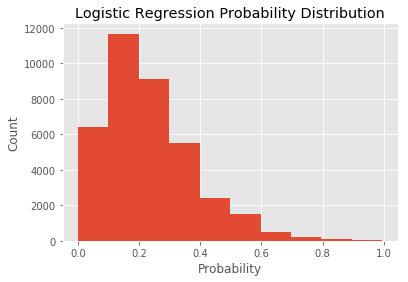

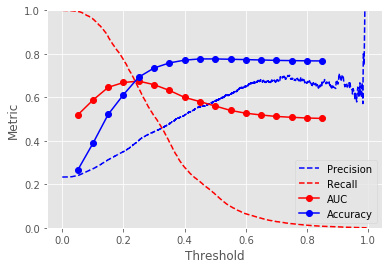

In [41]:
# Do RandomizedSearchCV to find optimal Logistic Regression Classifier
direc = '/Users/Anthony/Documents/Bootcamp/Takehome_ultimate/models/'
my_makedir(direc)
logr = LogR() 
param_grid = {"C": [0.01,.05,.1,1,10,100]}
filename = 'mod_logr1.p'
exists = os.path.isfile(direc+filename)
if exists:
    mod_logr = pickle.load( open( direc+filename, "rb" ) )
else:
    mod_logr = RSCV(estimator=logr, param_distributions=param_grid, n_iter=30, cv=3,scoring='roc_auc',verbose=50)
    mod_logr.fit(Xtr,ytr) 
    pickle.dump( mod_logr, open( direc+filename, "wb" ) ) 
print('Best ROC AUC score = ',mod_logr.best_score_)
print(mod_logr.best_estimator_)
print(mod_logr.best_params_)
get_metrics(mod_logr.best_estimator_,Xtr,Xte,ytr,yte,thresh = 0.3)
mod = mod_logr.best_estimator_
modprobs = mod.predict_proba(Xtr)
plt.hist(modprobs[:,1])
plt.title('Logistic Regression Probability Distribution')
plt.xlabel('Probability')
plt.ylabel('Count')
plt.show()
y_pred = modprobs[:,1]
do_auc_prec_recall(ytr,y_pred,show_confusion=0)

#### Random Forest Classifier

<div class="span5 alert alert-success">
<p> The Random Forest Classifier does better, with a training and testing AUC of 0.98 and 0.80, respectively. The disparity between these two values suggests overfitting. Here, the optimal threshold looks to be about 0.35.
   </p>
</div>

Best ROC AUC score =  0.795625593785595
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=131, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
{'max_features': 6, 'min_samples_split': 10, 'n_estimators': 131}
TRAINING SET
AUC =  0.9812321032426001
[[25236  3508]
 [  346  8410]]
TEST SET
AUC =  0.8000991059886615
[[7215 2347]
 [ 902 2036]]


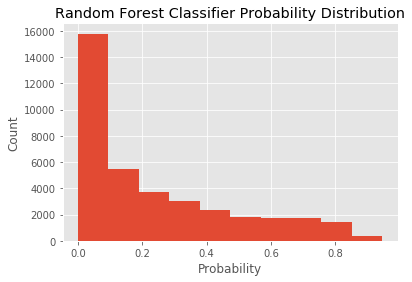

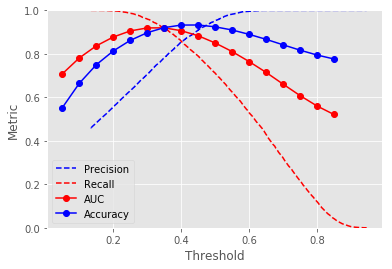

In [42]:
# Do RandomizedSearchCV to find optimal Random Forest Classifier
from scipy.stats import randint as sp_randint
direc = '/Users/Anthony/Documents/Bootcamp/Takehome_ultimate/models/'
my_makedir(direc)
rfc = RFC() 
param_grid = {"max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "n_estimators": sp_randint(50,200)}
filename = 'mod_rscv2.p'
exists = os.path.isfile(direc+filename)
if exists:
    mod_rscv = pickle.load( open( direc+filename, "rb" ) )
else:
    mod_rscv = RSCV(estimator=rfc, param_distributions=param_grid, n_iter=20, cv=3,scoring='roc_auc',verbose=50)
    mod_rscv.fit(Xtr,ytr) 
    pickle.dump( mod_rscv, open( direc+filename, "wb" ) ) 
print('Best ROC AUC score = ',mod_rscv.best_score_)
print(mod_rscv.best_estimator_)
print(mod_rscv.best_params_)
get_metrics(mod_rscv.best_estimator_,Xtr,Xte,ytr,yte,thresh = 0.3)
mod = mod_rscv.best_estimator_
modprobs = mod.predict_proba(Xtr)
plt.hist(modprobs[:,1])
plt.title('Random Forest Classifier Probability Distribution')
plt.xlabel('Probability')
plt.ylabel('Count')
plt.show()
y_pred = modprobs[:,1]
do_auc_prec_recall(ytr,y_pred,show_confusion=0)

#### Gradient Boosted Classifier

<div class="span5 alert alert-success">
<p> The Gradient Boosted Classifier did the best, with a training and testing AUC of 0.83 and 0.82, respectively. There is very little overfitting, and the optimal threshold is about 0.25.
   </p>
</div>

Best ROC AUC score =  0.820254493092361
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=4,
              min_weight_fraction_leaf=0.0, n_estimators=165,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
{'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 165}
TRAINING SET
AUC =  0.831202331998784
[[23161  5583]
 [ 2775  5981]]
TEST SET
AUC =  0.8202886318646435
[[7600 1962]
 [ 898 2040]]


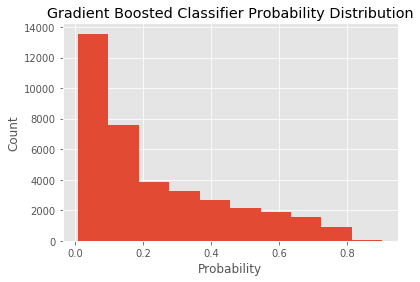

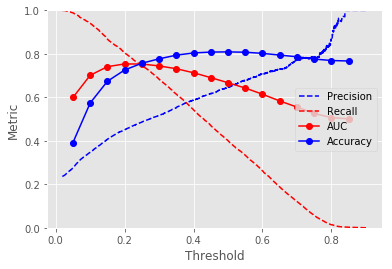

In [43]:
# Do RandomizedSearchCV to find optimal Gradient Boosted Classifier
from sklearn.ensemble import GradientBoostingClassifier as GBC
direc = '/Users/Anthony/Documents/Bootcamp/Takehome_ultimate/models/'
my_makedir(direc)
gbc = GBC() 
param_grid = {"max_depth": sp_randint(1, 20),
              "min_samples_split": sp_randint(2, 11),
              "n_estimators": sp_randint(50,200)}
filename = 'mod_gbc.p'
exists = os.path.isfile(direc+filename)
if exists:
    mod_gbc = pickle.load( open( direc+filename, "rb" ) )
else:
    mod_gbc = RSCV(estimator=gbc, param_distributions=param_grid, n_iter=20, cv=3,scoring='roc_auc',verbose=50)
    mod_gbc.fit(Xtr,ytr) 
    pickle.dump( mod_gbc, open( direc+filename, "wb" ) ) 
print('Best ROC AUC score = ',mod_gbc.best_score_)
print(mod_gbc.best_estimator_)
print(mod_gbc.best_params_)
get_metrics(mod_gbc.best_estimator_,Xtr,Xte,ytr,yte,thresh = 0.3)
mod = mod_gbc.best_estimator_
modprobs = mod.predict_proba(Xtr)
plt.hist(modprobs[:,1])
plt.title('Gradient Boosted Classifier Probability Distribution')
plt.xlabel('Probability')
plt.ylabel('Count')
plt.show()
y_pred = modprobs[:,1]
do_auc_prec_recall(ytr,y_pred,show_confusion=0)

TRAINING SET
AUC =  0.831202331998784
[[21843  6901]
 [ 2219  6537]]
TEST SET
AUC =  0.8202886318646435
[[7168 2394]
 [ 742 2196]]


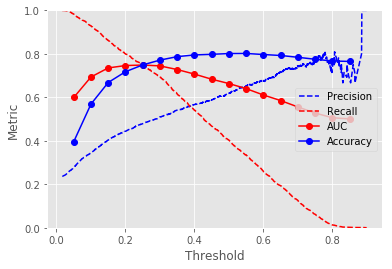

In [44]:
# This is the final best predictive model
gbc = GBC(max_depth= 3, min_samples_split=4, n_estimators= 165) 
gbc.fit(Xtr,ytr) 
get_metrics(gbc,Xtr,Xte,ytr,yte,thresh = 0.25)
modprobstest = gbc.predict_proba(Xte)
y_pred2 = modprobstest[:,1]
do_auc_prec_recall(yte,y_pred2,show_confusion=0)

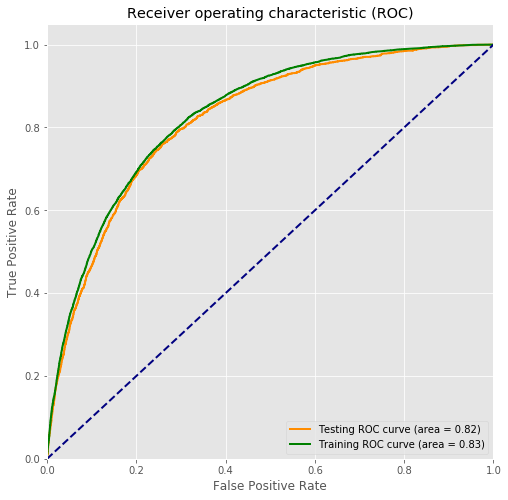

In [45]:
# Compute ROC curve and ROC area 
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr_tr = dict()
tpr_tr = dict()
roc_auc_tr = dict()
n_classes = 2
y_pred = gbc.predict_proba(Xte)[:,1]
y_pred_tr = gbc.predict_proba(Xtr)[:,1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(yte[:], y_pred[:])
    roc_auc[i] = auc(fpr[i], tpr[i])
    fpr_tr[i], tpr_tr[i], _ = roc_curve(ytr[:], y_pred_tr[:])
    roc_auc_tr[i] = auc(fpr_tr[i], tpr_tr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(yte.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
fpr_tr["micro"], tpr_tr["micro"], _ = roc_curve(ytr.ravel(), y_pred_tr.ravel())
roc_auc_tr["micro"] = auc(fpr_tr["micro"], tpr_tr["micro"])
fig = plt.figure(figsize=(8, 8))
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=2, label='Testing ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot(fpr_tr[0], tpr_tr[0], color='green',
         lw=2, label='Training ROC curve (area = %0.2f)' % roc_auc_tr[0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

<div class="span5 alert alert-success">
<p> Below, we see a list and bar plot of the feature importances of the model. The top 3 features are avg_rating_by_driver, surge_pct, and weekday_pct.
   </p>
</div>

Feature ranking:
1. feature 12: avg_rating_by_driver (0.249983)
2. feature 15: surge_pct (0.246335)
3. feature 17: weekday_pct (0.155169)
4. feature 0: city_1 (0.085111)
5. feature 5: phone_2 (0.049434)
6. feature 16: trips_in_first_30_days (0.046520)
7. feature 9: ultimate_black_user_2 (0.031151)
8. feature 1: city_2 (0.029345)
9. feature 11: avg_dist (0.025500)
10. feature 4: phone_1 (0.023625)


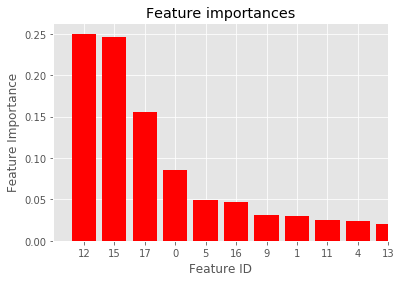

In [46]:
# Show which features are the most important
importances = gbc.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(0,10):  # range(Xtr2.shape[1]):
    print("%d. feature %d: %s (%f)" % (f + 1, indices[f],X.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1,10])
plt.xlabel('Feature ID')
plt.ylabel('Feature Importance')
plt.show()

In [47]:
# Group data by is_active to see the difference in features
df_orig.groupby('is_active').mean()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,no_of_rating,no_by_rating,days_since_trip
is_active,,,,,,,,,,,
0,6.080810,4.783663,4.60449,1.074009,8.655641,1.852451,0.335039,60.832601,0.190571,0.004777,110.636872
1,4.866582,4.760125,4.59196,1.077237,9.484676,3.672824,0.514794,61.232307,0.070292,0.001539,19.021635


<div class="span5 alert alert-success">
<p>     
   Above, we see that active users had an average of 3.7 trips in the first 30 days, whereas inactive users had an average 1.9 trips. Inactive users were also more likely to not rate their drivers. To encourage users to become more active, Ultimate could offer deals that encourage people to take at least 4 trips within the first 30 days.
    
   Overall, the Gradient Boosted Classifier was the most reliable, with a testing ROC AUC of 0.82. To improve the model, we could test more cases in the RandomizedSearchCV, at some computational cost. We could also test out additional models, such as SVM.
   </p>
</div>